In [83]:

import re
import sys
import math
import matplotlib.pyplot as plt

# filename = 'sumedh_garage.sub'
filename = '17314.sub'

data = []
with open(filename, 'r') as f:
    for line in f:
        m = re.match(r'RAW_Data:\s*([-0-9 ]+)\s*$', line)

        if m:
            data.extend([ int(seg) for seg in m[1].split(r' ') if seg != ''])

accumulated_time = 0
absolute_times = []
bit_values = []

for time_interval in data:
    absolute_times.append(accumulated_time)
    accumulated_time += abs(time_interval)

    if time_interval > 0:
        bit_values.append(1)
    else:
        bit_values.append(0)

# convert to ms
absolute_times = [x / 1000 for x in absolute_times]

# big wave (sumedh)
# start_index = 3724
# end_index = 6645

# absolute_times = absolute_times[start_index:end_index]
# bit_values = bit_values[start_index:end_index]
# absolute_times = [x - absolute_times[0] for x in absolute_times]

In [84]:
# print large gaps in absolute time
threshold = 10000
for i in range(1, len(absolute_times)):
    if absolute_times[i] - absolute_times[i-1] > threshold:
        print(f'Large gap between times {absolute_times[i-1]} and {absolute_times[i]}, indices {i-1} to {i}, t = {absolute_times[i] - absolute_times[i-1]}')

In [85]:
# # small wave
# start_index = 2681
# end_index = 2730

# absolute_times = absolute_times[start_index:end_index]
# bit_values = bit_values[start_index:end_index]

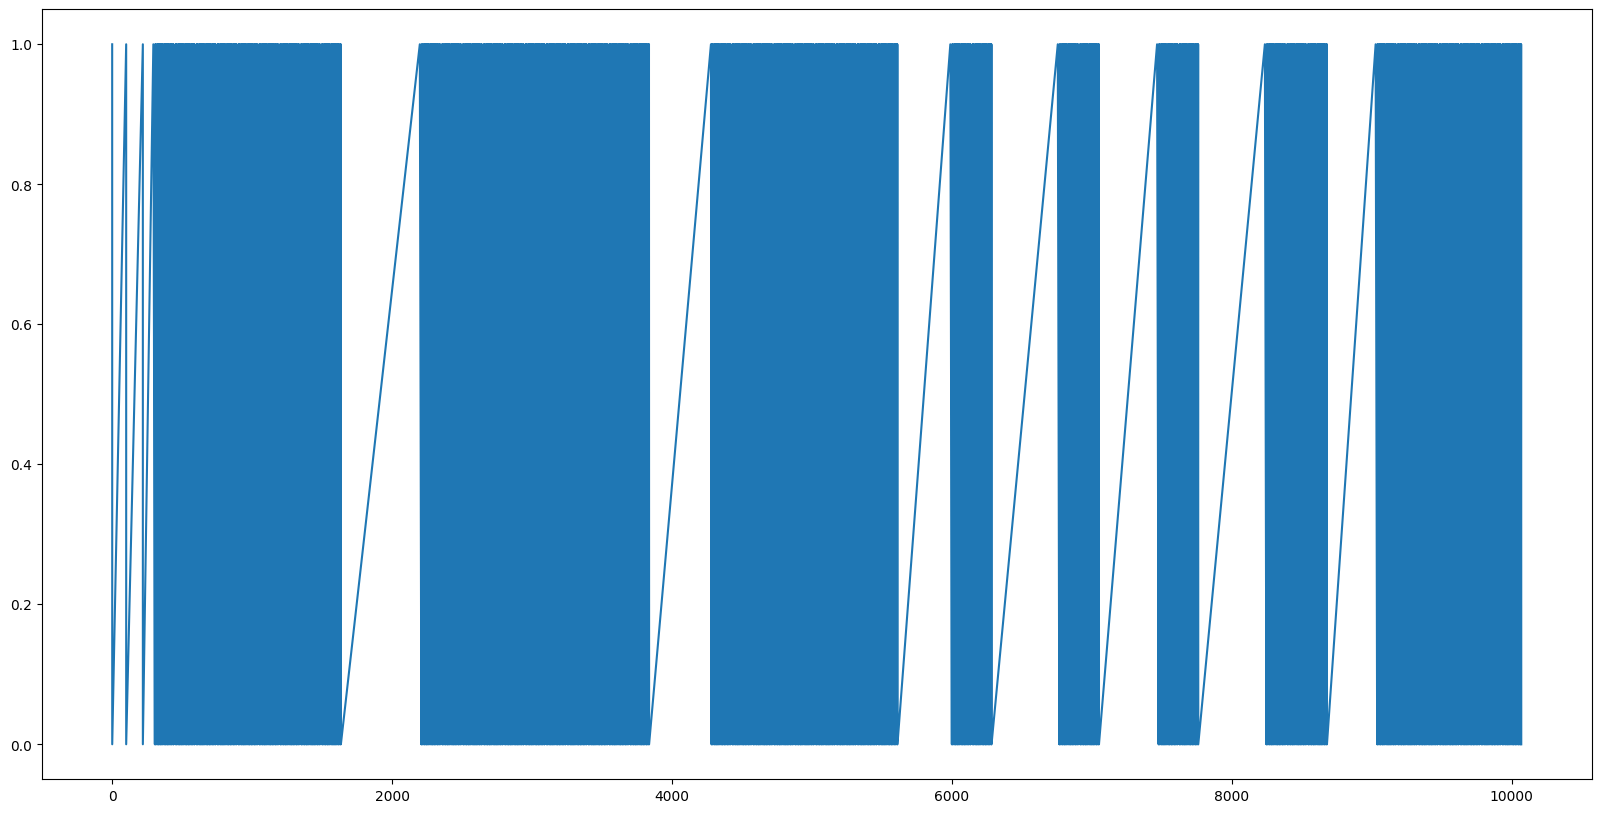

In [86]:
plt.figure(figsize=(20, 10))
plt.plot(absolute_times, bit_values)
plt.show()